In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow.keras as k
import ipyparallel as ipp
import time

#c=ipp.Client()

#dview=c[:]


**Note**
First I attempted here to download the data directly from the internet but later imported it directly from the pre-established from the Tensorflow itself, according to the specifications made by the problem statement.

In [2]:
(X_test,y_test),(X_train,y_train)=k.datasets.imdb.load_data(path="imdb.npz",num_words=10000,maxlen=100,seed=100)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\Sheshank_Joshi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Sheshank_Joshi\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [3]:
pd.DataFrame(X_train)

,0
0,"[1, 23, 4, 1927, 499, 12, 1054, 198, 4, 64, 15..."
1,"[1, 13, 92, 124, 51, 4, 1188, 7, 14, 22, 71, 2..."
2,"[1, 710, 910, 22, 44, 6, 1170, 1475, 37, 2507,..."
3,"[1, 48, 25, 235, 40, 3121, 2, 234, 23, 6, 22, ..."
4,"[1, 13, 219, 14, 159, 3821, 33, 4, 2, 22, 1413..."
...,...
2958,"[1, 13, 244, 131, 24, 252, 51, 4, 609, 14, 20,..."
2959,"[1, 13, 264, 15, 14, 16, 424, 8, 30, 1621, 42,..."
2960,"[1, 13, 28, 210, 77, 6, 666, 337, 7, 6071, 113..."
2961,"[1, 160, 503, 20, 18, 2369, 448, 1424, 23, 168..."


In [4]:
pd.DataFrame(y_train)

,0
0,0
1,0
2,0
3,0
4,1
...,...
2958,0
2959,0
2960,1
2961,0


In [5]:
pd.DataFrame(X_test)

,0
0,"[1, 18, 783, 254, 4424, 6477, 451, 64, 50, 26,..."
1,"[1, 14, 840, 4607, 20, 9, 99, 8762, 18, 1155, ..."
2,"[1, 6, 2096, 200, 14, 20, 5, 1065, 236, 2, 9, ..."
3,"[1, 14, 9, 31, 7, 4, 118, 7, 4, 201, 2, 56, 50..."
4,"[1, 25, 144, 124, 15, 13, 244, 4, 552, 7, 415,..."
...,...
2768,"[1, 48, 335, 11, 4, 1310, 18, 49, 8655, 641, 7..."
2769,"[1, 32, 14, 740, 44, 14, 112, 6, 78, 20, 9, 18..."
2770,"[1, 972, 39, 4, 644, 2118, 7, 4, 6227, 5090, 2..."
2771,"[1, 54, 13, 645, 8, 106, 14, 20, 23, 2, 300, 1..."


Having a look at this, the first character is 1 which means it is padded. If we apply some kind of lemmatization, it probably disappears. Lets go ahead and see it.

In [6]:
temp=pd.DataFrame(X_test)
temp["length"]=temp[0].apply(len)

In [7]:
temp.describe()

,length
count,2773.000000
mean,68.586729
std,18.463532
min,11.000000
25%,54.000000
50%,69.000000
75%,84.000000
max,99.000000


In [8]:
pd.DataFrame(y_test)

,0
0,0
1,0
2,0
3,1
4,0
...,...
2768,0
2769,1
2770,1
2771,1


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2963,)
(2963,)
(2773,)
(2773,)


In [10]:
y_train

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

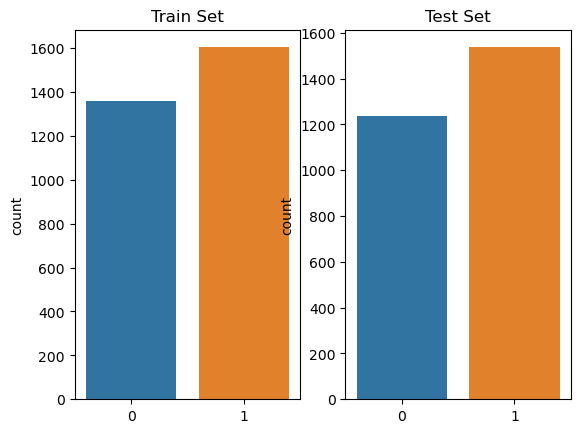

In [11]:
fig=plt.figure()
plt.subplot(1,2,1)
plt.title("Train Set")
sns.countplot(x=pd.Series(y_train))
#plt.show()
plt.subplot(1,2,2)
plt.title("Test Set")
sns.countplot(x=y_test)
plt.show()

The Set is completely balanced and finished here in terms of proper class balancing, it is not completely skewed. The test and train are both having the same kind of distribution and number of samples. This idea is being ignored here. As I plan to use some portion from test set towards validation set later on.

In [12]:
dictionary=k.datasets.imdb.get_word_index()

let us now check for what the first sentence means in translated terms.

In [13]:
print(len(dictionary))

88584


In [15]:
text=[]
for no in X_train[0]:
    for (key,value) in dictionary.items():
        if key==0:
            continue
        if no==value:
            text.append(key)


" ".join(text)

'the are of screaming able that filmmakers series of see 10 as on there part but that br screen i i as it of sure on was one your life to always life good do huge as on it look her brilliant was cinema to decide only major but history br of alone performances in is am out but his never and i i models by slut major saw film we in funny on what have pretty in person'

Now, let us see what its sentiment is.

In [16]:
print("positive" if y_train[0]==1 else "negative")

negative


Much better version is given in the link below :
https://builtin.com/data-science/how-build-neural-networks-keras
    

Now, lets define a function to handle all this, and package it nicely.


In [17]:
#####################################################################
# Function giving us the decoded text from the word index we have given
####################################################################

def text_decoder_back(n_list,dictionary=dictionary):
    text=[]
    for no in n_list:
        for (key,value) in dictionary.items():
            if no==value:
                text.append(key)
    text=" ".join(text)
    return text
#####################################################################
# End of Fucntion
###################################################################



**Approach** (This is wrong)
First we will try to run using simple Neural Network that doesn't do the embedding and simply takes in the vector supplied and tries to identify the patterns of sentiment. Then we will go with Sequential analysis of the data nd march ahead from there.

**Please Note**
I have made two data frames here 1. X_train_d 2. X_train_w.


X_train_d - Original document given in terms of numbers and various mechanisms of the original dataset



X_train_w - Converted to the word format as is given here. 

In [18]:
#Small function used for debugging.
def dbg(n):
    print("--------------Debug Statement {}---------------".format(n))

In [19]:
X_train_w=pd.Series(X_train).apply(text_decoder_back,dictionary=dictionary)
X_test_w=pd.Series(X_test).apply(text_decoder_back,dictionary=dictionary)

Looks like most reveiws are pretty consistent with most hovering around 250 characters length

In [33]:
X_train_w

0       the are of screaming able that filmmakers seri...
1       the was then does when of accent br as you tha...
2       the aren't badly you has is weren't bruce like...
3       the what have might just sexuality and since a...
4       the was least as new complain they of and you ...
                              ...                        
2958    the was rather these his woman when of number ...
2959    the was looking for as with absolutely in at p...
2960    the was one point will is mostly completely br...
2961    the funny child on but spoil fans element are ...
2962    the was did as on by br only an my minds kick ...
Length: 2963, dtype: object

In [34]:
X_train_d=pd.DataFrame(X_train)
X_test_d=pd.DataFrame(X_test)

In [36]:
X_train_d["length"]=X_train_d[0].apply(len)
X_test_d["length"]=X_train_d[0].apply(len)

In [37]:
X_train_d["length"].describe()


count    2963.000000
mean       67.951401
std        18.803248
min         7.000000
25%        53.000000
50%        68.000000
75%        84.000000
max        99.000000
Name: length, dtype: float64

In [38]:
X_test_d["length"].describe()

count    2773.000000
mean       67.832672
std        18.827292
min         7.000000
25%        53.000000
50%        68.000000
75%        84.000000
max        99.000000
Name: length, dtype: float64

<Figure size 640x480 with 0 Axes>

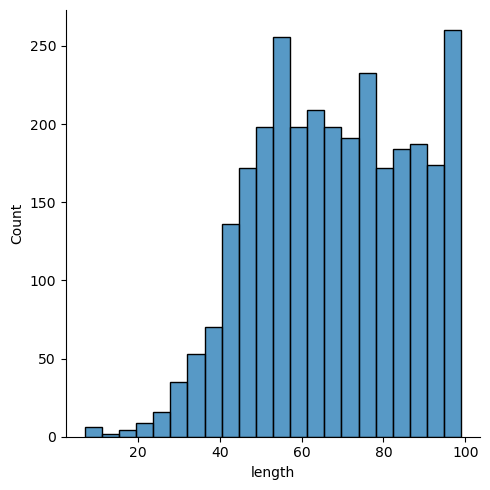

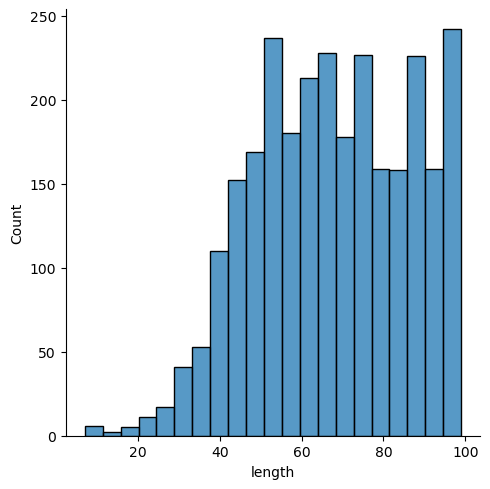

In [46]:
plt.figure()

#plt.title("Train_set")
#plt.subplot(1,2,1)
sns.displot(x=X_train_d["length"])
plt.show()

#plt.title("Test_set")
#plt.subplot(1,2,2)
sns.displot(x=X_test_d["length"])
plt.show()

The Words are pretty much cleanly distributed smooth. So, there is not much we will do about it.

In [39]:
X_train_d.to_csv("X_train_coded_Imdb.csv")
X_test_d.to_csv("X_test_coded_Imdb.csv")

In [26]:
pd.DataFrame(X_train_w).to_csv("X_train_Imdb.csv")
pd.DataFrame(X_test_w).to_csv("X_test_Imdb.csv")
pd.DataFrame(y_train).to_csv("y_train_Imdb.csv")
pd.DataFrame(y_test).to_csv('y_test_Imdb.csv')

# End of Chapter 1

In [39]:
pd.DataFrame(X_train) # Aview of how the tokenized and padded sequences look like

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0,0,0,0,0,0,0,0,0,0,...,19,72,8,160,20,48,25,181,8,412
1,0,0,0,1,13,92,124,51,4,1188,...,909,56,19,32,2580,7,2,9,1254,647
2,0,0,0,0,0,0,0,0,0,0,...,22,21,12,16,253,319,3199,2609,38,185
3,0,0,0,0,0,0,0,0,0,0,...,4,4141,529,81,24,990,8,67,14,20
4,0,0,0,0,0,0,0,0,0,0,...,71,4412,5,204,261,4,229,407,16,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,0,0,0,0,0,0,0,0,0,0,...,2,18,233,334,33,4,374,1130,233,334
2959,0,0,0,0,0,0,0,0,0,0,...,257,1195,341,32,549,15,338,7618,10,10
2960,0,0,0,0,0,0,0,1,13,28,...,210,4,5655,173,7,35,32,295,87,123
2961,0,0,0,0,0,0,0,0,0,0,...,27,102,99,851,12,48,25,26,2343,64


<tf.Tensor: shape=(2963, 99, 64), dtype=float32, numpy=
array([[[ 9.48794931e-03, -2.32570525e-02, -2.13666316e-02, ...,
          4.83831279e-02,  4.75746505e-02,  2.44798772e-02],
        [ 9.48794931e-03, -2.32570525e-02, -2.13666316e-02, ...,
          4.83831279e-02,  4.75746505e-02,  2.44798772e-02],
        [ 9.48794931e-03, -2.32570525e-02, -2.13666316e-02, ...,
          4.83831279e-02,  4.75746505e-02,  2.44798772e-02],
        ...,
        [-8.81788880e-03,  1.32384337e-02, -3.76990810e-02, ...,
         -7.09518790e-05,  2.00669803e-02,  5.62002510e-03],
        [ 3.69308330e-02, -2.35546585e-02,  2.36373022e-03, ...,
         -2.19797622e-02,  2.86215283e-02,  6.04107231e-03],
        [ 1.18415430e-03, -1.47991255e-03, -1.13575459e-02, ...,
          2.35885121e-02, -4.05665636e-02,  3.51938345e-02]],

       [[ 9.48794931e-03, -2.32570525e-02, -2.13666316e-02, ...,
          4.83831279e-02,  4.75746505e-02,  2.44798772e-02],
        [ 9.48794931e-03, -2.32570525e-02, -2.1

In [46]:
model = Sequential()
model.add(Embedding(vocabSize, embed_dim))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

NotImplementedError: Cannot convert a symbolic Tensor (lstm_4/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [45]:
model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=30)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [69]:
import tensorflow
class Tf_language_model():
    embed_size=128 # To Change
    max_features=5000 #To change
    
    #####################################################################
    #####################################################################
    
    
    
    
    #####################################################################
    #####################################################################
    import tensorflow
    import tensorflow as tf
    import tensorflow.keras as k
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences

    from tensorflow.keras.layers import Convolution1D
    from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
    
    ##################################################################### 
    ##################################################################### 
    def __init__(self,input_Data,memory=True,*args,**kwargs):
        self.memory_model=memory
        dbg(1)
        self.model_built=False
        self.X_train=input_Data
        self.input_shape=self.X_train.shape
        self.model=tensorflow.keras.Sequential()
        print(self.input_shape)
        self.model_init()
        self.inputs=tensorflow.keras.Input(shape=())
        
    def model_init(self):
        from tensorflow.keras.layers import Dense , InputLayer , LSTM , Embedding, Dropout , Activation, GRU, Flatten
        from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
        from tensorflow.keras.models import Model, Sequential
        if not self.model_built:
            self.model.add(InputLayer(shape=(self.input_shape)))
            self.model.add(Embedding(5000, 128))
            #if self.memory_model:
                #Bidirectional model is to be added here.
               # self.add(Bidirectional(LSTM(32, return_sequences = True)))
            #else:
            self.model.add(Dense(64))
            self.model.add(Dropout(0.2))
            temp=Tf_language_model.embed_size/2
            #while temp>2:
            self.model.add(Dense(16))
            self.model.add(Dropout(0.2))
            temp=int(temp/2)
            self.model.add(Dense(1))
            #self.set_params({"inputs":inputs,"outputs":output})
            #super().__init__(inputs=inputs,outputs=outputs)
            self.model.compile()
            self.model_built=True
            print(self.model.summary())
        else:
            print("Model Already Built")
            
    def model_train(self,y_train):
        self.model.fit(self.X_train,y_train,batch_size=100,epochs=30,validation_split=0.2)





my_model=Tf_language_model(X_train,memory=False)

--------------Debug Statement 1---------------
(25000, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 128)         640000    
_________________________________________________________________
dense_18 (Dense)             (None, None, 64)          8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
dense_19 (Dense)             (None, None, 16)          1040      
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
dense_20 (Dense)             (None, None, 1)           17        
Total params: 649,313
Trainable params: 649,313
Non-trainable

In [131]:
#my_model.model_train(pd.Series(y_train).to_numpy())

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [141]:
vocabulary

NameError: name 'vocabulary' is not defined

In [137]:
X_train[0].shape

(25000,)

In [108]:
incharge=X_train[0]

In [127]:
for each in X_train[1:10][0]:
    print(each)
    print(len(each))
    np.append(l,np.array(each))

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
189
[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19

In [129]:
l

array(20)

In [83]:
inputs=k.Input(shape=(3,))

In [84]:
#y=Dense(20)
for i in range(20,1,4):
    print(i)

In [97]:
y=k.layers.Dense(60)(inputs)
i=20
while i>1:
    print(i)
    y=k.layers.Dense(i)(y)
    i=int(i/2)
y=k.layers.Dense(1)(y)

mod=k.Model(inputs=inputs,outputs=y)
mod.compile()
    

20
10
5
2


In [100]:
mod.outputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_23')>]

In [95]:
mod2=k.Model()
mod2.inputs=inputs
mod2.outputs=y
mod2.build(input_shape)

TypeError: build() missing 1 required positional argument: 'input_shape'

In [94]:
mod2.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.